## Try 9.2.1: k-nearest neighbors classification in Python.

**The Python code classifies beans by the bean's major and minor axis lengths.**

* **Click the double-right arrow to restart the kernel and run all cells.**
* **Examine the code below.**
* **Increase the number of neighbors from k = 5. Observe the changes in the accuracy and in the region's edges for each variety of bean.**

In [1]:
pip install mlxtend

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
    --------------------------------------- 0.0/1.4 MB 640.0 kB/s eta 0:00:03
   -- ------------------------------------- 0.1/1.4 MB 919.0 kB/s eta 0:00:02
   ----- ---------------------------------- 0.2/1.4 MB 1.3 MB/s eta 0:00:01
   --------- ------------------------------ 0.3/1.4 MB 1.5 MB/s eta 0:00:01
   --------------- ------------------------ 0.5/1.4 MB 2.0 MB/s eta 0:00:01
   ----------------------------- ---------- 1.0/1.4 MB 3.5 MB/s eta 0:00:01
   ---------------------------------------  1.4/1.4 MB 4.1 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 3.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.plotting import plot_decision_regions

In [5]:
pd.set_option('future.no_silent_downcasting', True)

In [7]:
# Read data, clean up names

beans = pd.read_csv('Dry_Bean_Dataset.csv')
beans['Class'] = beans['Class'].str.capitalize()
print(beans.shape)
beans.describe()

(13611, 17)


,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860154,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


In [9]:

# Import needed packages for classification
from sklearn.neighbors import KNeighborsClassifier

# Import packages for evaluation
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [11]:

# Initialize model
beanKnnClassifier = KNeighborsClassifier(n_neighbors=5)
# Split data
X = beans[['MajorAxisLength', 'MinorAxisLength']]
y = beans[['Class']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [13]:
from sklearn.preprocessing import StandardScaler
# Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [15]:
# Train model and make predictions for the test set.
beanKnnClassifier.fit(X_train_scaled, np.ravel(y_train))
y_pred = beanKnnClassifier.predict(scaler.transform(X_test))

In [17]:
# Predict one bean
bean = pd.DataFrame(data={'MajorAxisLength': [400], 'MinorAxisLength': [200]})
beanKnnClassifier.predict(scaler.transform(bean))

array(['Horoz'], dtype=object)

In [19]:
from sklearn import metrics
# Compute metrics
print(metrics.accuracy_score(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

0.8731635651322233
[[293   0  90   0   4   4  26]
 [  0 165   0   0   0   0   0]
 [ 60   0 425   0  10   0   1]
 [  0   0   0 976   3  22  82]
 [  1   0  10   2 533   0  22]
 [  6   0   0  18   0 537  18]
 [  7   0   1 104  10  17 637]]


# Visualizing the regions of classification

In [22]:
# Take a sample to keep runtime low while seeing what areas are classified as each bean
beanSample = beans.sample(200, random_state=123)
beanSample.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,54127.990000,865.381605,324.575264,202.770531,1.599216,0.758134,54884.245000,255.138392,0.749011,0.986699,0.868323,0.795476,0.006565,0.001682,0.636377,0.994809
std,30512.573123,225.933495,89.417657,46.635806,0.245734,0.085995,30943.202531,61.979882,0.049709,0.005112,0.062621,0.060103,0.001155,0.000596,0.095587,0.004285
min,22726.000000,550.994000,203.892624,142.389986,1.105963,0.427131,23071.000000,170.104797,0.588422,0.956634,0.670689,0.664848,0.003293,0.000700,0.442023,0.969040
25%,36224.750000,704.808250,256.953182,173.406526,1.431583,0.715583,36561.750000,214.761800,0.713677,0.985245,0.819555,0.759451,0.005897,0.001120,0.576766,0.993542
50%,45035.500000,798.344000,298.759333,191.330168,1.570727,0.771155,45534.500000,239.459747,0.758957,0.988034,0.879373,0.796584,0.006696,0.001651,0.634546,0.996236
75%,63414.750000,981.381000,383.678223,216.577589,1.722959,0.814333,64208.000000,284.151661,0.786572,0.989729,0.917764,0.834575,0.007363,0.002170,0.696515,0.997552
max,191042.000000,1693.703000,648.057449,389.461020,2.241201,0.894939,193440.000000,493.195934,0.840000,0.993906,0.986812,0.949719,0.008972,0.003127,0.901966,0.999674


In [24]:


beanSample['Int'] = beanSample['Class'].replace(
    to_replace=['Barbunya', 'Bombay', 'Cali', 'Dermason', 'Horoz', 'Seker', 'Sira'],
    value=[0, 1, 2, 3, 4, 5, 6]
).infer_objects(copy=False)  




# Define input and output features
X = beanSample[['MajorAxisLength', 'MinorAxisLength']]
y = beanSample[['Int']]

# Fit model
beanKnnClassifier.fit(X, np.ravel(y))

KNeighborsClassifier()

### In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.

### On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

C:\Users\anupk\anaconda3\Lib\site-packages\mlxtend\plotting\decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


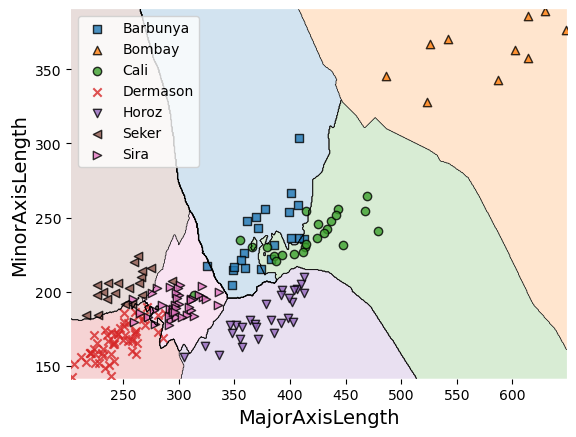

In [27]:
# Set background opacity to 20%
contourf_kwargs = {'alpha': 0.2}

# Use filled circular markers to avoid matplotlib warning
scatter_kwargs = {'edgecolor': 'k', 'marker': 'o'}

# Convert to NumPy for consistency
X_np = X.to_numpy()
y_np = np.ravel(y)

# Train with NumPy array (matches plot input)
beanKnnClassifier.fit(X_np, y_np)

# Plot decision boundary regions
p = plot_decision_regions(X=X_np, y=y_np, 
                          clf=beanKnnClassifier, 
                          contourf_kwargs=contourf_kwargs,
                          scatter_kwargs=scatter_kwargs,
                          legend=2)

# Add title and axis labels
p.set_xlabel('MajorAxisLength', fontsize=14)
p.set_ylabel('MinorAxisLength', fontsize=14)

# Customize legend labels
L = plt.legend()
L.get_texts()[0].set_text('Barbunya')
L.get_texts()[1].set_text('Bombay')
L.get_texts()[2].set_text('Cali')
L.get_texts()[3].set_text('Dermason')
L.get_texts()[4].set_text('Horoz')
L.get_texts()[5].set_text('Seker')
L.get_texts()[6].set_text('Sira')

# Show plot
plt.show()


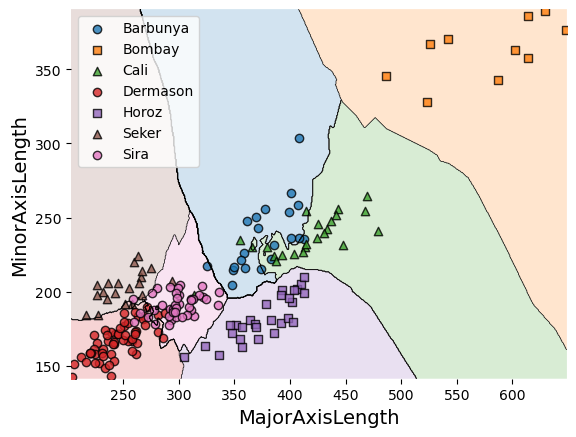

In [28]:
# Set background opacity
contourf_kwargs = {'alpha': 0.2}

# Set scatter marker to 'o' (circle) and black edgecolor
scatter_kwargs = {'edgecolor': 'k', 'marker': 'o'}

# Train model
X_np = X.to_numpy()
y_np = np.ravel(y)
beanKnnClassifier.fit(X_np, y_np)

# Plot decision regions
p = plot_decision_regions(X=X_np, y=y_np, 
                          clf=beanKnnClassifier, 
                          contourf_kwargs=contourf_kwargs, 
                          markers=['o', 's', '^'],
                          scatter_kwargs=scatter_kwargs,  # <== Very important
                          legend=2)



# Labels and legend
p.set_xlabel('MajorAxisLength', fontsize=14)
p.set_ylabel('MinorAxisLength', fontsize=14)

L = plt.legend()
L.get_texts()[0].set_text('Barbunya')
L.get_texts()[1].set_text('Bombay')
L.get_texts()[2].set_text('Cali')
L.get_texts()[3].set_text('Dermason')
L.get_texts()[4].set_text('Horoz')
L.get_texts()[5].set_text('Seker')
L.get_texts()[6].set_text('Sira')

# Show plot
plt.show()


## 2) Try 9.2.2: k-nearest neighbors regression in Python.

**The Python code below predicts a bean's convex area from the bean's major and minor axis lengths.**

* **Click the double-right arrow to restart the kernel and run all cells.**
* **Examine the code below.**
* **Increase the number of neighbors from k = 5. Observe the changes in the RMSE.**

In [31]:
from sklearn.neighbors import KNeighborsRegressor

# Initialize model
beanKnnRegressor = KNeighborsRegressor(n_neighbors=5)
# Split data
X = beans[['MajorAxisLength', 'MinorAxisLength']]
y = beans[['ConvexArea']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [36]:
# Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [38]:

# Fit model and predict on test data
bean_knn_regressor.fit(X_train, np.ravel(y_train))
y_pred = bean_knn_regressor.predict(X_test)


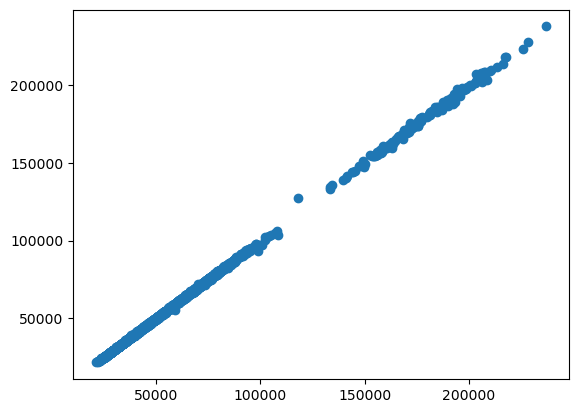

In [40]:
# Plot the actual value vs. the predicted value
plt.scatter(x=y_test, y=y_pred)


In [42]:
# Compute metrics
print(metrics.mean_squared_error(y_pred, y_test))
print(metrics.r2_score(y_pred, y_test))

196189.42460333006
0.9997647288190386


## challenge activity 9.2.2: K-nearest neighbors classification using scikit-learn.

**1)This dataset contains data on sleep habits for 26 randomly selected mammals. Each mammal is categorized as an omnivore, herbivore, carnivore, or insectivore.**

* **Initialize a k-nearest neighbors classification model with k=5.**

  
**The code contains all imports, loads the dataset, fits the model, and applies the model.**

In [ ]:
# Import dataset
sleep = pd.read_csv('sleep.csv')

# Create input matrix X and output matrix y
X = sleep[['bodywt', 'sleep_rem']]
y = sleep[['vore']]

# Your code goes here

knnModel = knnModel.fit(X, np.ravel(y))

# Print predictions
print(knnModel.predict(X))

## 2) **This dataset contains data on sleep habits for 23 randomly selected mammals. Each mammal is categorized as an omnivore, herbivore, carnivore, or insectivore.**

* **Fit the provided k-nearest neighbors model.**

  
**The code contains all imports, loads the dataset, initializes the model, and applies the model**

In [ ]:
# Create input matrix X and output matrix y
X = sleep[['awake', 'brainwt']]
y = sleep[['vore']]

knnModel = KNeighborsClassifier(n_neighbors=7)

# Your code goes here

# Print predictions
print(knnModel.predict(X))

## 3)
**This dataset contains data on sleep habits for 23 randomly selected mammals. Each mammal is categorized as an omnivore, herbivore, carnivore, or insectivore.**

* **REM sleep cycles of guinea pigs average 0.8 hours. Guinea pigs are awake on average 14.6 hours per day.**
* **Use the kneighbors() method to find the instances in the training data that are closest to guinea pigs. Assign the instances, but not the distances, to neighbors.**
**The code contains all imports, loads the dataset, initializes the model, and applies the model to a test dataset.**

In [ ]:
# Create input matrix X and output matrix y
X = sleep[['sleep_rem', 'awake']]
y = sleep[['vore']]

knnModel = KNeighborsClassifier(n_neighbors=5)
knnModel = knnModel.fit(X.values, np.ravel(y.values))

# Your code goes here

# Print neighbors
print(neighbors)